In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
from torch.optim.lr_scheduler import ExponentialLR

import pandas as pd
import matplotlib.pyplot as plt
import os
import jetnet 
from jetnet.evaluation import w1p,w1efp,w1m
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import hist
import vector
import mplhep as hep
from hist import Hist
import ctypes

import FrEIA.framework as Ff
import FrEIA.modules as Fm
import sys
plt.style.use(hep.style.ROOT)



import json
import traceback
import copy
from scipy import interpolate
from scipy.stats import norm



In [3]:
from nf import NF

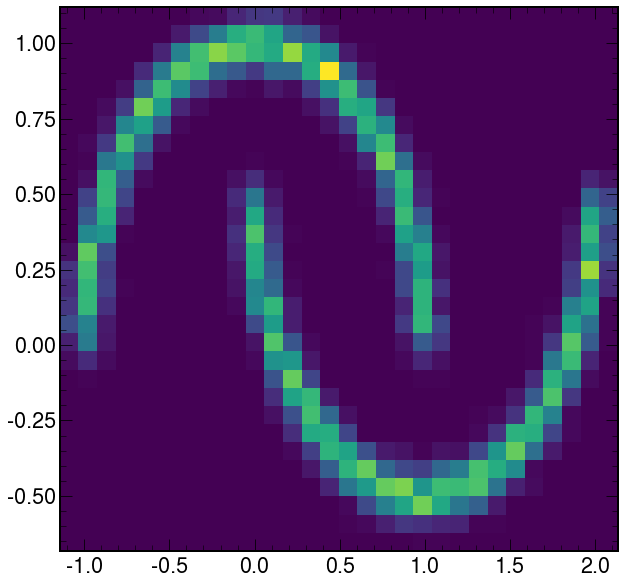

In [5]:
data=make_moons(10000,noise=0.05)[0]
plt.hist2d(data[:,0],data[:,1],bins=30)
plt.show()

In [13]:
basic_config={
        "network_layers": 1,
        "network_nodes":300,
        "lrdecay":0.99,#tune.uniform(0.9,0.999),
        "wdecay":0.99,#tune.uniform(0.9,0.999),
        "opt":1,#tune.uniform(0,1),#tune.choice(["adam","adamw"]),
        "permute_soft":True,#tune.uniform(0,1),#tune.choice([False,True]),
        "batch_size":300,
        "lr": 0.0001,#tune.uniform(0.00005,0.005),# tune.sample_from(lambda _: 1**(int(-np.random.randint(1, 4))),
        "activation": 0.5,#tune.uniform(0,3),
        "coupling_layers":8,#tune.uniform(3,20),#tune.randint(6,300),
        "max_steps":1000 ,
        "use_mass":0#tune.uniform(0,1),#tune.choice([False,True])  
        ,"marginal_flow":False,
        "name":"t_",
        "path":"/home/kaechben/debug/prepush_no_marg"
        }
flow=NF()
flow.train(data=data,config=basic_config,patience=100)

n_eval: 100
/home/kaechben/debug/prepush_no_marg /home/kaechben/debug/prepush_no_marg/plots
loss: 0.46
loss: 0.42
loss: 0.39
loss: 0.37
loss: 0.35
loss: 0.32
loss: 0.30
loss: 0.28
loss: 0.25
loss: 0.23
loss: 0.22
loss: 0.20
loss: 0.19
loss: 0.17
loss: 0.16
loss: 0.16
loss: 0.15
loss: 0.14
loss: 0.13
loss: 0.13
loss: 0.12
loss: 0.12
loss: 0.11
loss: 0.11
loss: 0.10
loss: 0.10
loss: 0.09
loss: 0.09
loss: 0.09
loss not decreasing values 0.09, strike 1
loss: 0.08
loss: 0.08
loss not decreasing values 0.08, strike 1
loss: 0.08
loss: 0.07
loss: 0.07
loss: 0.07
loss: 0.07
loss not decreasing values 0.07, strike 1
loss: 0.06
loss: 0.06
loss: 0.07
loss not decreasing values 0.07, strike 1
loss: 0.07
loss not decreasing values 0.07, strike 2
loss: 0.06
loss: 0.06
loss: 0.06
loss not decreasing values 0.06, strike 1
loss: 0.06
loss: 0.06
loss not decreasing values 0.06, strike 1
loss: 0.06
loss not decreasing values 0.06, strike 2
loss: 0.05
loss: 0.05
loss: 0.06
loss not decreasing values 0.06, 

(9000, 2)


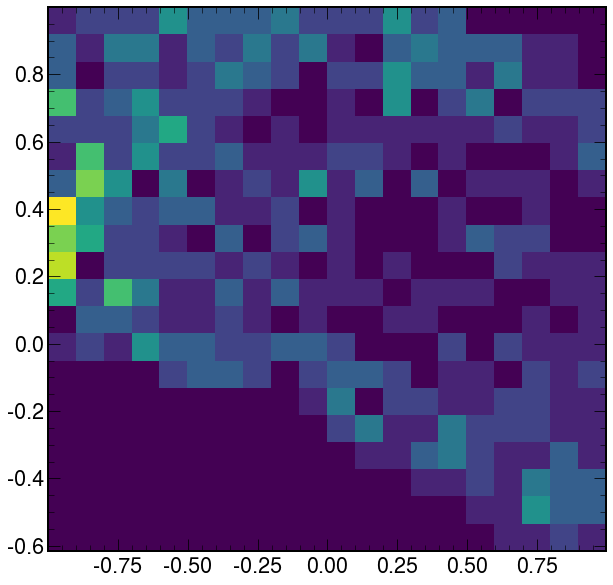

In [15]:
print(flow.data.shape)
gen=flow.sample_transform(best=False)
gen=gen[abs(gen[:,0])<1]
gen=gen[abs(gen[:,1])<1]
plt.hist2d(gen[:,0],gen[:,1],bins=20)
plt.show(       )

SequenceINN(
  (module_list): ModuleList(
    (0): AllInOneBlock(
      (softplus): Softplus(beta=0.5, threshold=20)
      (subnet): Sequential(
        (0): Linear(in_features=1, out_features=320, bias=True)
        (1): Tanh()
        (2): Linear(in_features=320, out_features=320, bias=True)
        (3): Tanh()
        (4): Linear(in_features=320, out_features=2, bias=True)
      )
    )
    (1): AllInOneBlock(
      (softplus): Softplus(beta=0.5, threshold=20)
      (subnet): Sequential(
        (0): Linear(in_features=1, out_features=320, bias=True)
        (1): Tanh()
        (2): Linear(in_features=320, out_features=320, bias=True)
        (3): Tanh()
        (4): Linear(in_features=320, out_features=2, bias=True)
      )
    )
    (2): AllInOneBlock(
      (softplus): Softplus(beta=0.5, threshold=20)
      (subnet): Sequential(
        (0): Linear(in_features=1, out_features=320, bias=True)
        (1): Tanh()
        (2): Linear(in_features=320, out_features=320, bias=True)
   